/* Welcome to the SQL mini project. You will carry out this project partly in
the PHPMyAdmin interface, and partly in Jupyter via a Python connection.

This is Tier 2 of the case study, which means that there'll be less guidance for you about how to setup
your local SQLite connection in PART 2 of the case study. This will make the case study more challenging for you: 
you might need to do some digging, aand revise the Working with Relational Databases in Python chapter in the previous resource.

Otherwise, the questions in the case study are exactly the same as with Tier 1. 

PART 1: PHPMyAdmin
You will complete questions 1-9 below in the PHPMyAdmin interface. 
Log in by pasting the following URL into your browser, and
using the following Username and Password:

URL: https://sql.springboard.com/
Username: student
Password: learn_sql@springboard

The data you need is in the "country_club" database. This database
contains 3 tables:
    i) the "Bookings" table,
    ii) the "Facilities" table, and
    iii) the "Members" table.

In this case study, you'll be asked a series of questions. You can
solve them using the platform, but for the final deliverable,
paste the code for each solution into this script, and upload it
to your GitHub.

Before starting with the questions, feel free to take your time,
exploring the data, and getting acquainted with the 3 tables. */

/* QUESTIONS 
/* Q1: Some of the facilities charge a fee to members, but some do not.
Write a SQL query to produce a list of the names of the facilities that do. */

SELECT name
FROM Facilities
WHERE membercost <> 0

/* Q2: How many facilities do not charge a fee to members? */

SELECT COUNT(name)
FROM Facilities
WHERE membercost = 0
out: 4 facilites do noy charge a fee

/* Q3: Write an SQL query to show a list of facilities that charge a fee to members,
where the fee is less than 20% of the facility's monthly maintenance cost.
Return the facid, facility name, member cost, and monthly maintenance of the
facilities in question. */

SELECT facid, name, membercost, monthlymaintenance
FROM Facilities 
WHERE membercost < (0.2 * monthlymaintenance)

/* Q4: Write an SQL query to retrieve the details of facilities with ID 1 and 5.
Try writing the query without using the OR operator. */

SELECT *
FROM Facilities
WHERE facid
IN (1,5)

/* Q5: Produce a list of facilities, with each labelled as
'cheap' or 'expensive', depending on if their monthly maintenance cost is
more than $100. Return the name and monthly maintenance of the facilities
in question. */

SELECT name, montlymaintenance 
CASE WHEN monthlymaintenance > 100 THEN 'expensive'
     ELSE 'cheap' END AS price
FROM members 


/* Q6: You'd like to get the first and last name of the last member(s)
who signed up. Try not to use the LIMIT clause for your solution. */

SELECT surname, firstname
FROM Members
WHERE joindate = 
(SELECT MAX(joindate)
    FROM Members)

/* Q7: Produce a list of all members who have used a tennis court.
Include in your output the name of the court, and the name of the member
formatted as a single column. Ensure no duplicate data, and order by
the member name. */

SELECT alias.court, CONCAT( alias.Fname,  ' ', alias.Lname ) AS name
FROM (SELECT Facilities.name AS court, Members.firstname AS Fname, Members.surname AS Lname
FROM Bookings
INNER JOIN Facilities ON Bookings.facid = Facilities.facid
AND Facilities.name LIKE  'Tennis Court%'
INNER JOIN Members ON Bookings.memid = Members.memid) AS alias
GROUP BY alias.court, alias.Fname, alias.Lname
ORDER BY name


Q8: Produce a list of bookings on the day of 2012-09-14 which
will cost the member (or guest) more than $30. Remember that guests have
different costs to members (the listed costs are per half-hour 'slot'), and
the guest user's ID is always 0. Include in your output the name of the
facility, the name of the member formatted as a single column, and the cost.
Order by descending cost, and do not use any subqueries.

SELECT Facilities.name AS facility, CONCAT( Members.firstname,  ' ', Members.surname ) AS name, 
CASE WHEN Bookings.memid =0
THEN Facilities.guestcost * Bookings.slots
ELSE Facilities.membercost * Bookings.slots END AS price

FROM Bookings
INNER JOIN Facilities ON Bookings.facid = Facilities.facid
AND Bookings.starttime LIKE  '2012-09-14%'
AND (
    ((Bookings.memid =0) AND (Facilities.guestcost * Bookings.slots >30))
OR 
    ((Bookings.memid !=0) AND (Facilities.membercost * Bookings.slots >30))
)
INNER JOIN Members ON Bookings.memid = Members.memid
ORDER BY price DESC


Q9: This time, produce the same result as in Q8, but using a subquery.

SELECT * 
FROM (
SELECT Facilities.name AS facility, CONCAT( Members.firstname,  ' ', Members.surname ) AS name, 
CASE WHEN Bookings.memid =0
THEN Facilities.guestcost * Bookings.slots
ELSE Facilities.membercost * Bookings.slots
END AS price
    
FROM Bookings
INNER JOIN Facilities ON Bookings.facid = Facilities.facid
AND Bookings.starttime LIKE  '2012-09-14%'
INNER JOIN Members ON Bookings.memid = Members.memid
) AS alias

WHERE alias.price >30
ORDER BY alias.price DESC


# PART 2: SQLite

We now want you to jump over to a local instance of the database on your machine. 

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
engine = create_engine('sqlite:///sqlite_db_pythonsqlite.db')

In [3]:
con = engine.connect()

In [4]:
rs = con.execute("SELECT * FROM Facilities")

In [5]:
df = pd.DataFrame(rs.fetchall())

In [6]:
df.columns = rs.keys()

In [7]:
df

,facid,name,membercost,guestcost,initialoutlay,monthlymaintenance
0,0,Tennis Court 1,5.0,25.0,10000,200
1,1,Tennis Court 2,5.0,25.0,8000,200
2,2,Badminton Court,0.0,15.5,4000,50
3,3,Table Tennis,0.0,5.0,320,10
4,4,Massage Room 1,9.9,80.0,4000,3000
5,5,Massage Room 2,9.9,80.0,4000,3000
6,6,Squash Court,3.5,17.5,5000,80
7,7,Snooker Table,0.0,5.0,450,15
8,8,Pool Table,0.0,5.0,400,15


### Q10: 
Produce a list of facilities with a total revenue less than 1000.
The output of facility name and total revenue, sorted by revenue. Remember
that there's a different cost for guests and members!

revinue less than 1000
select facility name and total revenue sorted by revinue


In [8]:
query10 = '''SELECT alias.name, SUM(alias.Revenue) AS Revenue
FROM 
(
SELECT Bookings.facid, Bookings.memid, Facilities.name, Facilities.guestcost, Facilities.membercost, COUNT( Bookings.facid ) AS facid_count,
CASE
WHEN Bookings.memid =0
THEN COUNT( Bookings.facid ) * Facilities.guestcost
ELSE COUNT( Bookings.facid ) * Facilities.membercost
END AS 'Revenue'
FROM Bookings
LEFT JOIN Facilities ON Bookings.facid = Facilities.facid
GROUP BY Bookings.facid, Bookings.memid
) AS alias
GROUP BY alias.facid
HAVING Revenue <=1000;'''

In [9]:
rs = con.execute(query10)
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
print(df)

              name  Revenue
0  Badminton Court    604.5
1     Table Tennis     90.0
2    Snooker Table    115.0
3       Pool Table    265.0


In [10]:
query11 = '''SELECT Members.surname, Members.firstname, Members.recommendedby, m.surname, m.firstname
FROM Members
LEFT JOIN Members AS m ON Members.recommendedby = m.memid
WHERE Members.recommendedby != 0
ORDER BY m.surname, m.firstname;'''

In [11]:
rs = con.execute(query11)
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
print(df)

              surname  firstname recommendedby   surname  firstname
0               GUEST      GUEST                    None       None
1               Smith     Darren                    None       None
2               Smith      Tracy                    None       None
3              Rownam        Tim                    None       None
4               Tracy     Burton                    None       None
5             Farrell     Jemima                    None       None
6             Farrell      David                    None       None
7          Tupperware   Hyacinth                    None       None
8               Smith     Darren                    None       None
9              Sarwin  Ramnaresh            15     Bader   Florence
10             Coplin       Joan            16     Baker    Timothy
11            Genting    Matthew             5   Butters     Gerald
12              Baker    Timothy            13   Farrell     Jemima
13             Pinker      David            13  

# Q12: 
Find the facilities with their usage by member, but not guests

In [12]:
query12 = '''SELECT booked.facid, 
COUNT( booked.memid ) AS member_usage, facility.name
FROM (
SELECT facid, memid
FROM Bookings
WHERE memid !=0
) AS booked
LEFT JOIN Facilities AS facility ON booked.facid = facility.facid
GROUP BY booked.facid;'''

In [13]:
rs = con.execute(query12)
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
print(df)

   facid  member_usage             name
0      0           308   Tennis Court 1
1      1           276   Tennis Court 2
2      2           344  Badminton Court
3      3           385     Table Tennis
4      4           421   Massage Room 1
5      5            27   Massage Room 2
6      6           195     Squash Court
7      7           421    Snooker Table
8      8           783       Pool Table


# Q13: 
Find the facilities usage by month, but not guests

In [14]:
query13 = '''SELECT EXTRACT(month FROM starttime) AS month, name, COUNT(name) AS 'facility usage' FROM Bookings 
LEFT JOIN Facilities 
USING(facid)
WHERE memid != 0 
GROUP BY month, name;'''

The SQL query above works in the PHPMyAdmin interface however, i cannot seem to make it work in this python noebook. I also tried a simmilar query using the 'MONTH' function but python still returned an error. this is a picture of the output in the PHPMyAdmin interface of query13
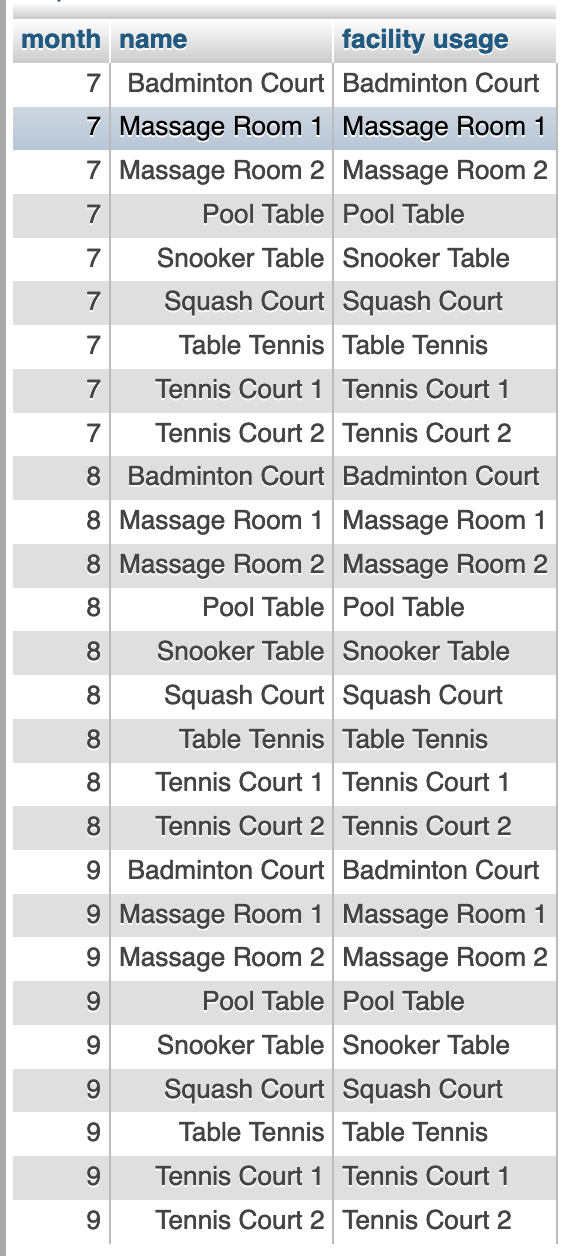

In [15]:
rs = con.execute(query13)
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
print(df)

OperationalError: (sqlite3.OperationalError) near "FROM": syntax error
[SQL: SELECT EXTRACT(month FROM starttime) AS month, name, COUNT(name) AS 'facility usage' FROM Bookings 
LEFT JOIN Facilities 
USING(facid)
WHERE memid != 0 
GROUP BY month, name;]
(Background on this error at: http://sqlalche.me/e/e3q8)